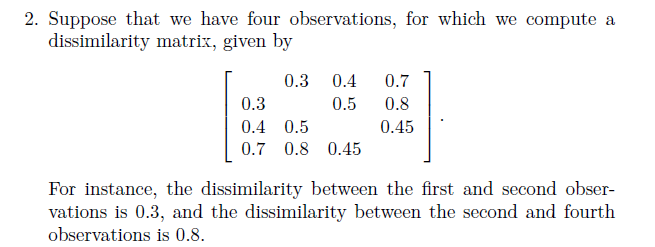

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = r"C:\Users\shant\OneDrive\桌面\ML_Fintech\0923\q.png"                          #圖片路徑
Image(filename = PATH , width=850, height=600) 

# (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

In [3]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

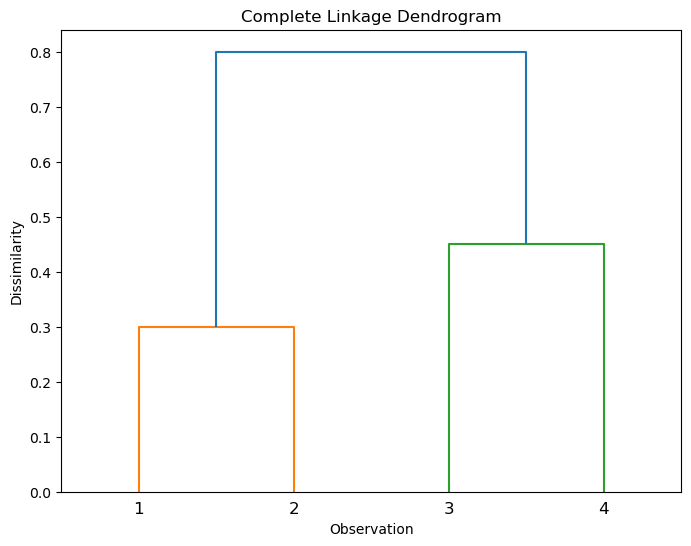

In [4]:
# Given dissimilarity matrix (upper triangular form of the symmetric matrix)
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# Convert the upper triangular part of the dissimilarity matrix to a condensed matrix format
condensed_matrix = sch.distance.squareform(dissimilarity_matrix)

# Perform complete linkage hierarchical clustering
Z_complete = sch.linkage(condensed_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(Z_complete, labels=[1, 2, 3, 4])
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()

# (b) Repeat (a), this time using single linkage clustering.

In [8]:
import scipy.cluster.hierarchy as hierarchy

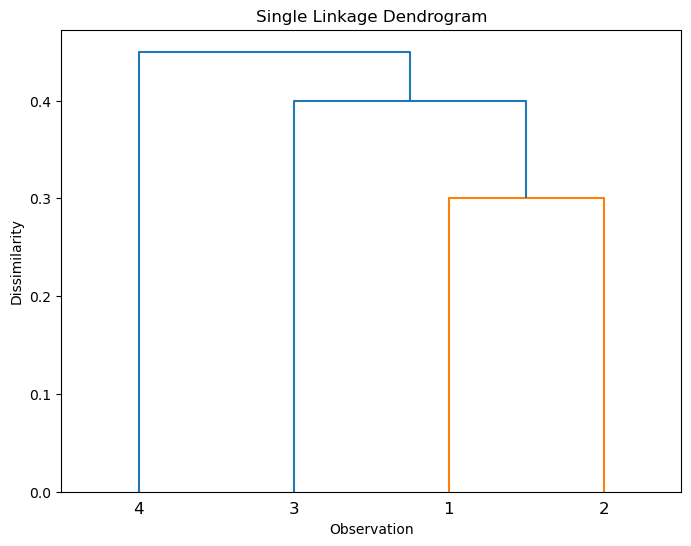

In [11]:
# Inputting the dissimilarity matrix, upper triangular version
dissimilarity = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

distance_vector = sch.distance.squareform(dissimilarity)

Z_single = sch.linkage(distance_vector, method='single')

# 
plt.figure(figsize=(8, 6))
sch.dendrogram(Z_single, labels=[1, 2, 3, 4])
plt.title('Single Linkage Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()


# (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

A: {1, 2}, {3, 4}

# (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

A: {1, 2, 3}, {4}

# (e) It is mentioned in this chapter that at each fusion in the dendrogram,the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

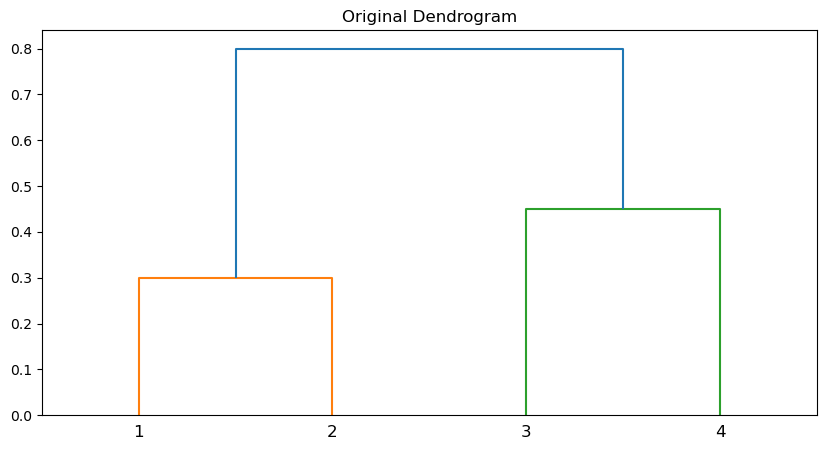

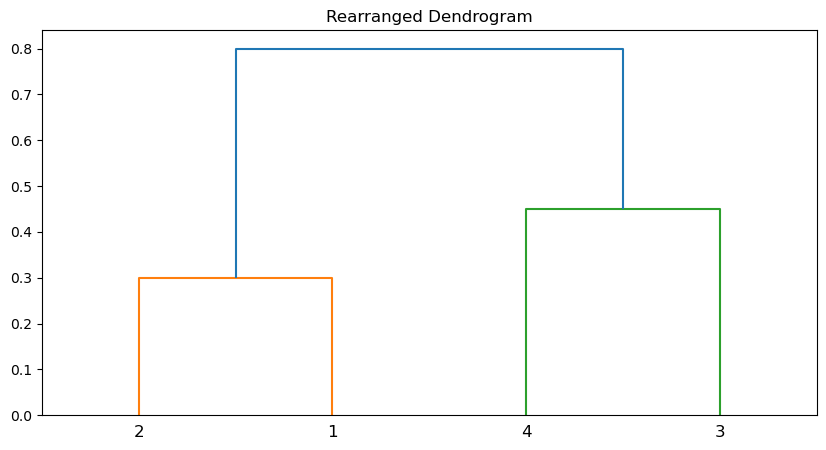

In [13]:
# Assuming 'linked' is your linkage matrix from the original dendrogram
# Let's mock this with random data for demonstration purposes
np.random.seed(0)  # For reproducible linkage matrix
data = np.random.rand(4, 10)  # Random data matrix with 4 observations
linked = sch.linkage(data, 'complete')  # Complete linkage clustering

# Original leaf order
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(Z_complete, labels=['1', '2', '3', '4'])
plt.title('Original Dendrogram')
plt.show()

# New leaf order, swapping '1' with '3' and '2' with '4'
# We manually specify the leaf order using 'leaf_rotation'
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(Z_complete, labels=['2', '1', '4', '3'])
plt.title('Rearranged Dendrogram')
plt.show()


The order of the leaves has been rearranged to 3, 4, 1, 2, effectively swapping the two clusters.

Despite the change in the order of the leaves, the hierarchical structure and the clustering process (the mergers and their heights) remain unchanged, illustrating that the meaning of the dendrogram has not been altered.

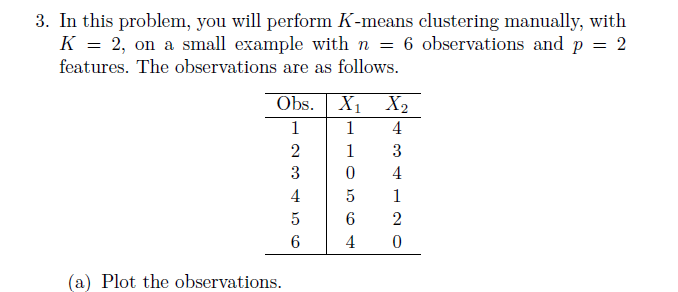

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = r"C:\Users\shant\OneDrive\桌面\ML_Fintech\0923\3.png"                          #圖片路徑
Image(filename = PATH , width=850, height=600) 

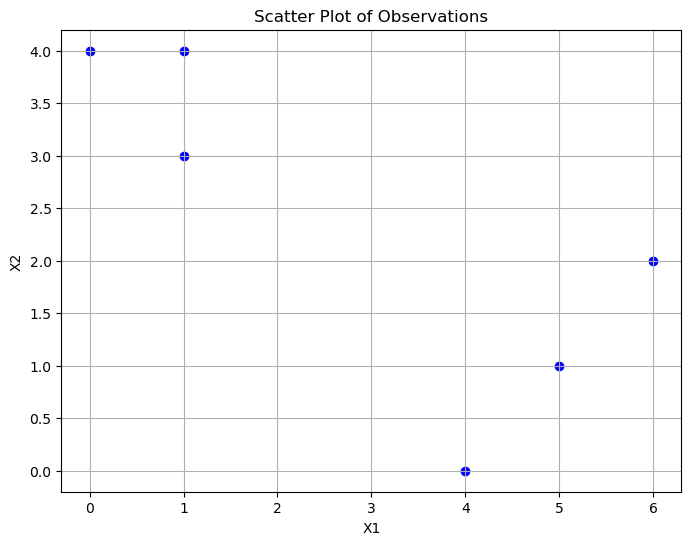

Initial random cluster labels: [0 1 1 0 1 1]


In [15]:
# Given data points
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

# Step (a): Plot the observations
plt.figure(figsize=(8, 6))
plt.scatter(observations[:, 0], observations[:, 1], color='blue', marker='o')
plt.title("Scatter Plot of Observations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# Step (b): Randomly assign cluster labels
np.random.seed(0)  # for reproducibility
cluster_labels = np.random.choice([0, 1], size=len(observations))
print("Initial random cluster labels:", cluster_labels)


# (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [16]:
#  Randomly assign cluster labels
np.random.seed(42)  # for reproducibility
cluster_labels = np.random.choice([0, 1], size=len(observations))

# Reporting the initial cluster labels for each observation
for i, label in enumerate(cluster_labels):
    print(f"Observation {i + 1}: Cluster {label}")

Observation 1: Cluster 0
Observation 2: Cluster 1
Observation 3: Cluster 0
Observation 4: Cluster 0
Observation 5: Cluster 0
Observation 6: Cluster 1


# (c) Compute the centroid for each cluster.

In [17]:
# (c): Compute the centroids for each cluster

# Find indices for each cluster
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_1_indices = np.where(cluster_labels == 1)[0]

# Compute centroid for Cluster 0
centroid_0 = np.mean(observations[cluster_0_indices], axis=0)

# Compute centroid for Cluster 1
centroid_1 = np.mean(observations[cluster_1_indices], axis=0)

centroid_0, centroid_1

(array([3.  , 2.75]), array([2.5, 1.5]))

# (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [18]:
from scipy.spatial import distance

# Step (d): Assign each observation to the centroid it is closest to

# Function to calculate Euclidean distance and reassign clusters
def assign_clusters(observations, centroids):
    new_labels = []
    for obs in observations:
        # Calculate distances to each centroid
        dist_to_0 = distance.euclidean(obs, centroids[0])
        dist_to_1 = distance.euclidean(obs, centroids[1])
        # Choose the closest centroid
        if dist_to_0 < dist_to_1:
            new_labels.append(0)
        else:
            new_labels.append(1)
    return new_labels

# Reassigning cluster labels based on the closest centroid
new_cluster_labels = assign_clusters(observations, [centroid_0, centroid_1])

# Report new cluster labels for each observation
new_cluster_labels

[0, 0, 0, 1, 0, 1]

# (e) Repeat (c) and (d) until the answers obtained stop changing.

In [22]:
import numpy as np

# Sample data for clustering
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

# Randomly assign initial cluster labels
np.random.seed(42)  # For reproducibility
cluster_labels = np.random.choice([0, 1], size=len(observations))
final_labels = []

# Perform K-means clustering iteratively
while not np.array_equal(final_labels, cluster_labels):
    final_labels = cluster_labels.copy()
    centroids = []

    # Compute centroids for each cluster
    for i in range(2):  # Assuming two clusters: 0 and 1
        cluster_points = observations[final_labels == i]
        if cluster_points.size > 0:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
        else:
            centroids.append(np.random.choice(observations.flatten(), size=2))  # Avoid empty cluster

    centroids = np.array(centroids)
    cluster_labels = []

    # Assign observations to the closest centroid
    for obs in observations:
        distances = np.linalg.norm(obs - centroids, axis=1)
        closest_centroid = np.argmin(distances)
        cluster_labels.append(closest_centroid)

# final cluster labels
print("Final Cluster Labels:")
for i, label in enumerate(cluster_labels):
    print(f'Obs.{i+1}: Cluster {label}')

#  final centroids
print("\nFinal Centroids:")
for i, centroid in enumerate(centroids):
    formatted_centroid = f"[{centroid[0]:.2f}, {centroid[1]:.2f}]"
    print(f"Centroid of Cluster {i}: {formatted_centroid}")



Final Cluster Labels:
Obs.1: Cluster 0
Obs.2: Cluster 0
Obs.3: Cluster 0
Obs.4: Cluster 1
Obs.5: Cluster 1
Obs.6: Cluster 1

Final Centroids:
Centroid of Cluster 0: [0.00, 1.00]
Centroid of Cluster 1: [5.00, 0.00]


# (f) In your plot from (a), color the observations according to the cluster labels obtained.

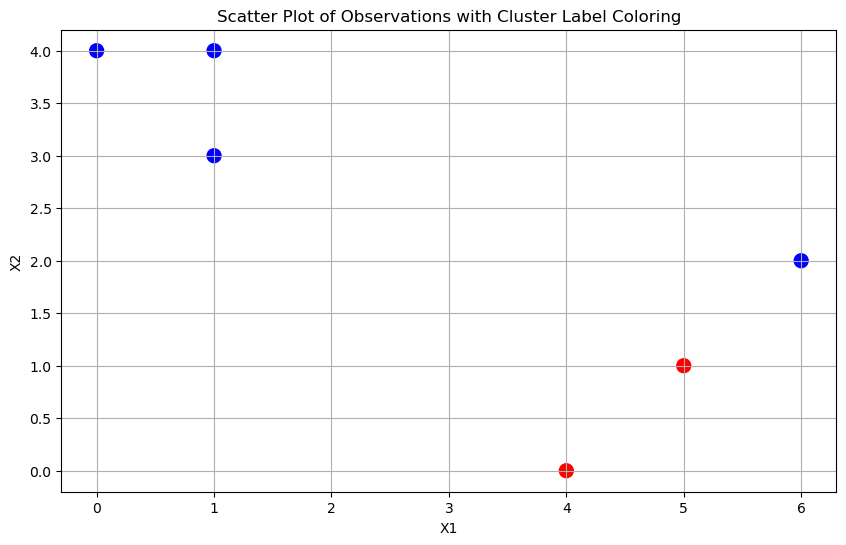

In [23]:
# Observations and final cluster labels from the previous output
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])
final_cluster_labels = [0, 0, 0, 1, 0, 1]

# Plotting the observations with color coding based on final cluster labels
plt.figure(figsize=(10, 6))
colors = ['blue' if label == 0 else 'red' for label in final_cluster_labels]
plt.scatter(observations[:, 0], observations[:, 1], color=colors, s=100)
plt.title('Scatter Plot of Observations with Cluster Label Coloring')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()
